# Project : Investment Prediction
* Objective : Study the investment pattern of bank customers to predict whether a new customer will invest or not

In [2]:
import pandas as pd
import numpy as np

#for data sampling
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression

#for model building
from sklearn.linear_model import LogisticRegression

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#for confusion matrix, accuracy, precision, and recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



In [6]:
#import the datd
df=pd.read_csv(r"C:\Users\sreer\Desktop\introtalent\python\Data Files used in Projects\Investment.csv")

In [7]:
df.shape #variables 41188 and 

(41188, 21)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,No
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,No
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,Yes
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,No
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,Yes


In [9]:
df['Invested'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
#replace yes with 1 and No with 0 in invested column because only boolean values can be used
df['Invested']=df['Invested'].replace(['Yes','No'],[1,0])

In [6]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [7]:
#checking data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
Invested            int64
dtype: object

In [8]:
#check missing values
df.isnull().sum() #No missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
Invested          0
dtype: int64

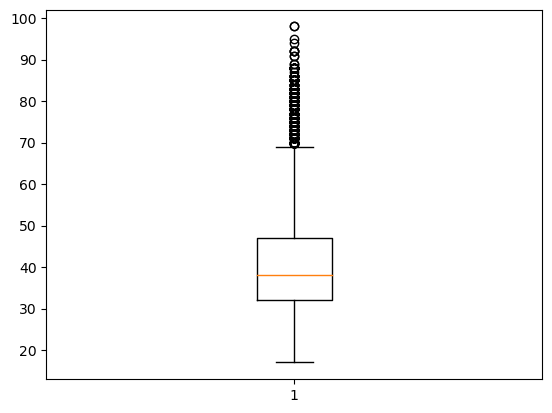

In [9]:
#outliers
plt.boxplot(df['age'])
plt.show()

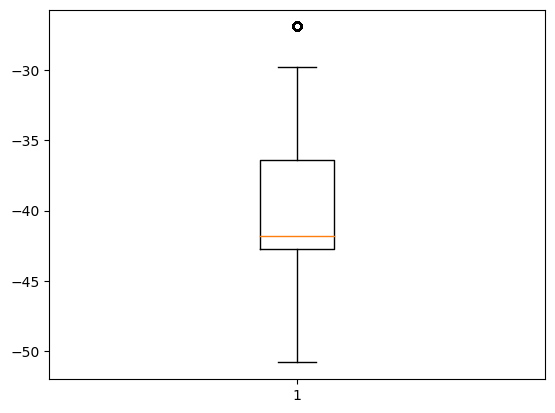

In [10]:
plt.boxplot(df['cons_conf_idx'])
plt.show()

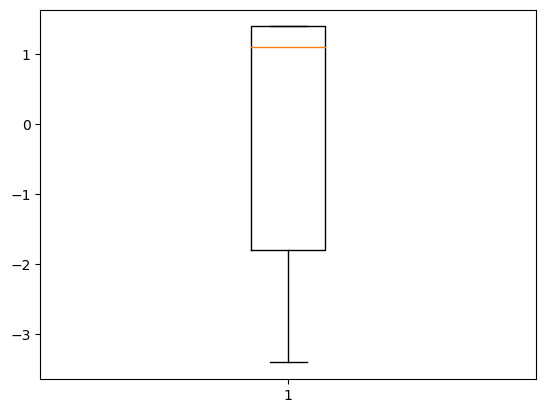

In [11]:
plt.boxplot(df['emp_var_rate'])
plt.show() #no outliers

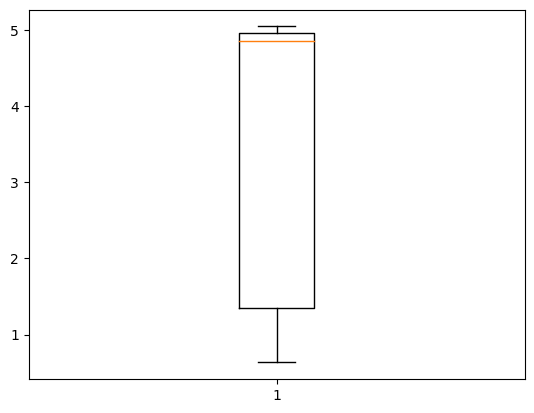

In [12]:
plt.boxplot(df['euribor3m'])
plt.show()

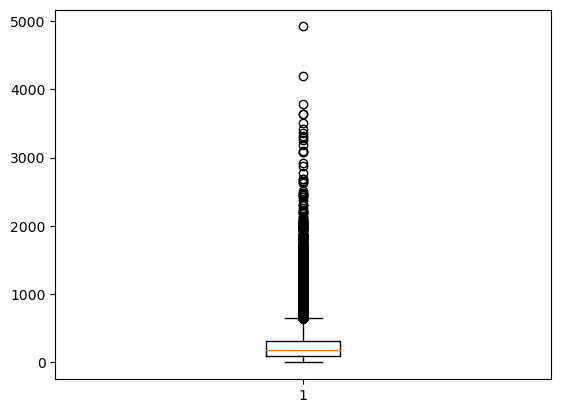

In [13]:
plt.boxplot(df['duration'])
plt.show()

In [14]:
#removing outliers by using user definig function

def remove_outliers(d,c):
    
    q1=d[c].quantile(.25)
    q3=d[c].quantile(.75)
    
    iqr=q3-q1
    
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    output=d[(d[c]>lb) & (d[c]<ub)]
    return output
    

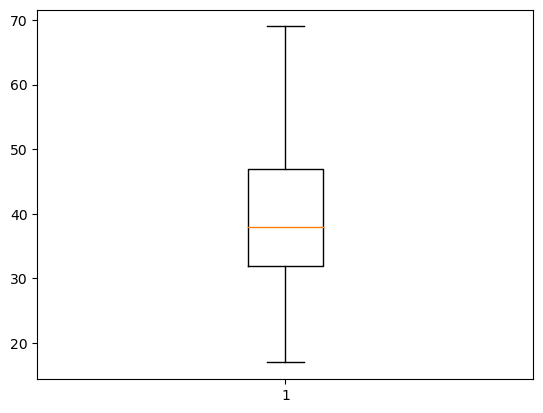

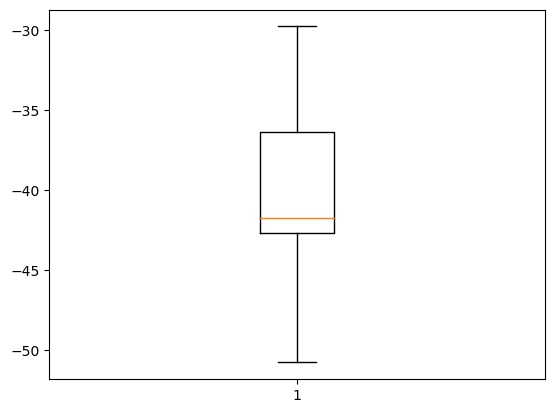

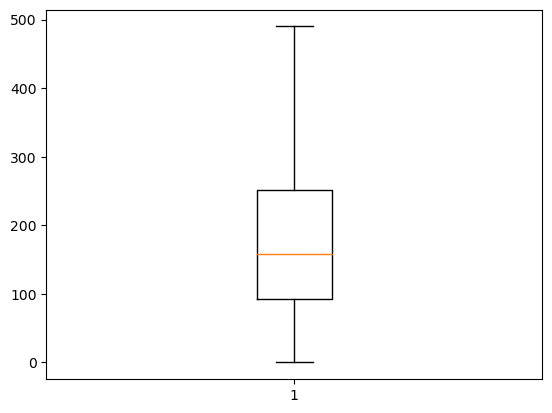

In [20]:
#remove outliers in cons_conf_idx and age
df=remove_outliers(df,"age")
df=remove_outliers(df,"cons_conf_idx")
df=remove_outliers(df,"duration")

plt.boxplot(df['age'])
plt.show()
plt.boxplot(df['cons_conf_idx'])
plt.show()
plt.boxplot(df['duration'])
plt.show()

In [21]:
df.shape

(35350, 21)

# Check values in categorical variable to ensure there is no issue

In [22]:
df['job'].unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [23]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [24]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [25]:
#replace basic.4y, basic.6y, and basic.9y with basic 

In [26]:
df['education']=df['education'].replace(['basic.4y','basic.6y','basic.9y'],['basic','basic','basic'])

In [27]:
df['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [28]:
df['default'].unique()

array(['unknown', 'no', 'yes'], dtype=object)

In [29]:
df['housing'].unique()

array(['yes', 'no', 'unknown'], dtype=object)

In [30]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [31]:
df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [32]:
df['month'].unique()

array(['aug', 'nov', 'jun', 'apr', 'jul', 'may', 'mar', 'sep', 'oct',
       'dec'], dtype=object)

In [33]:
df['day_of_week'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

In [34]:
df['campaign'].unique()

array([ 1,  3,  2,  8,  5,  4, 25, 11, 12, 18,  6, 17,  7, 20, 16, 14, 10,
       19, 29,  9, 13, 40, 15, 34, 22, 24, 41, 21, 23, 39, 28, 27, 31, 35,
       26, 30, 32, 43, 33, 42, 56, 37], dtype=int64)

In [35]:
df['poutcome'].unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

# ----------------------------EDA Starts----------------

C:\Users\sreer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


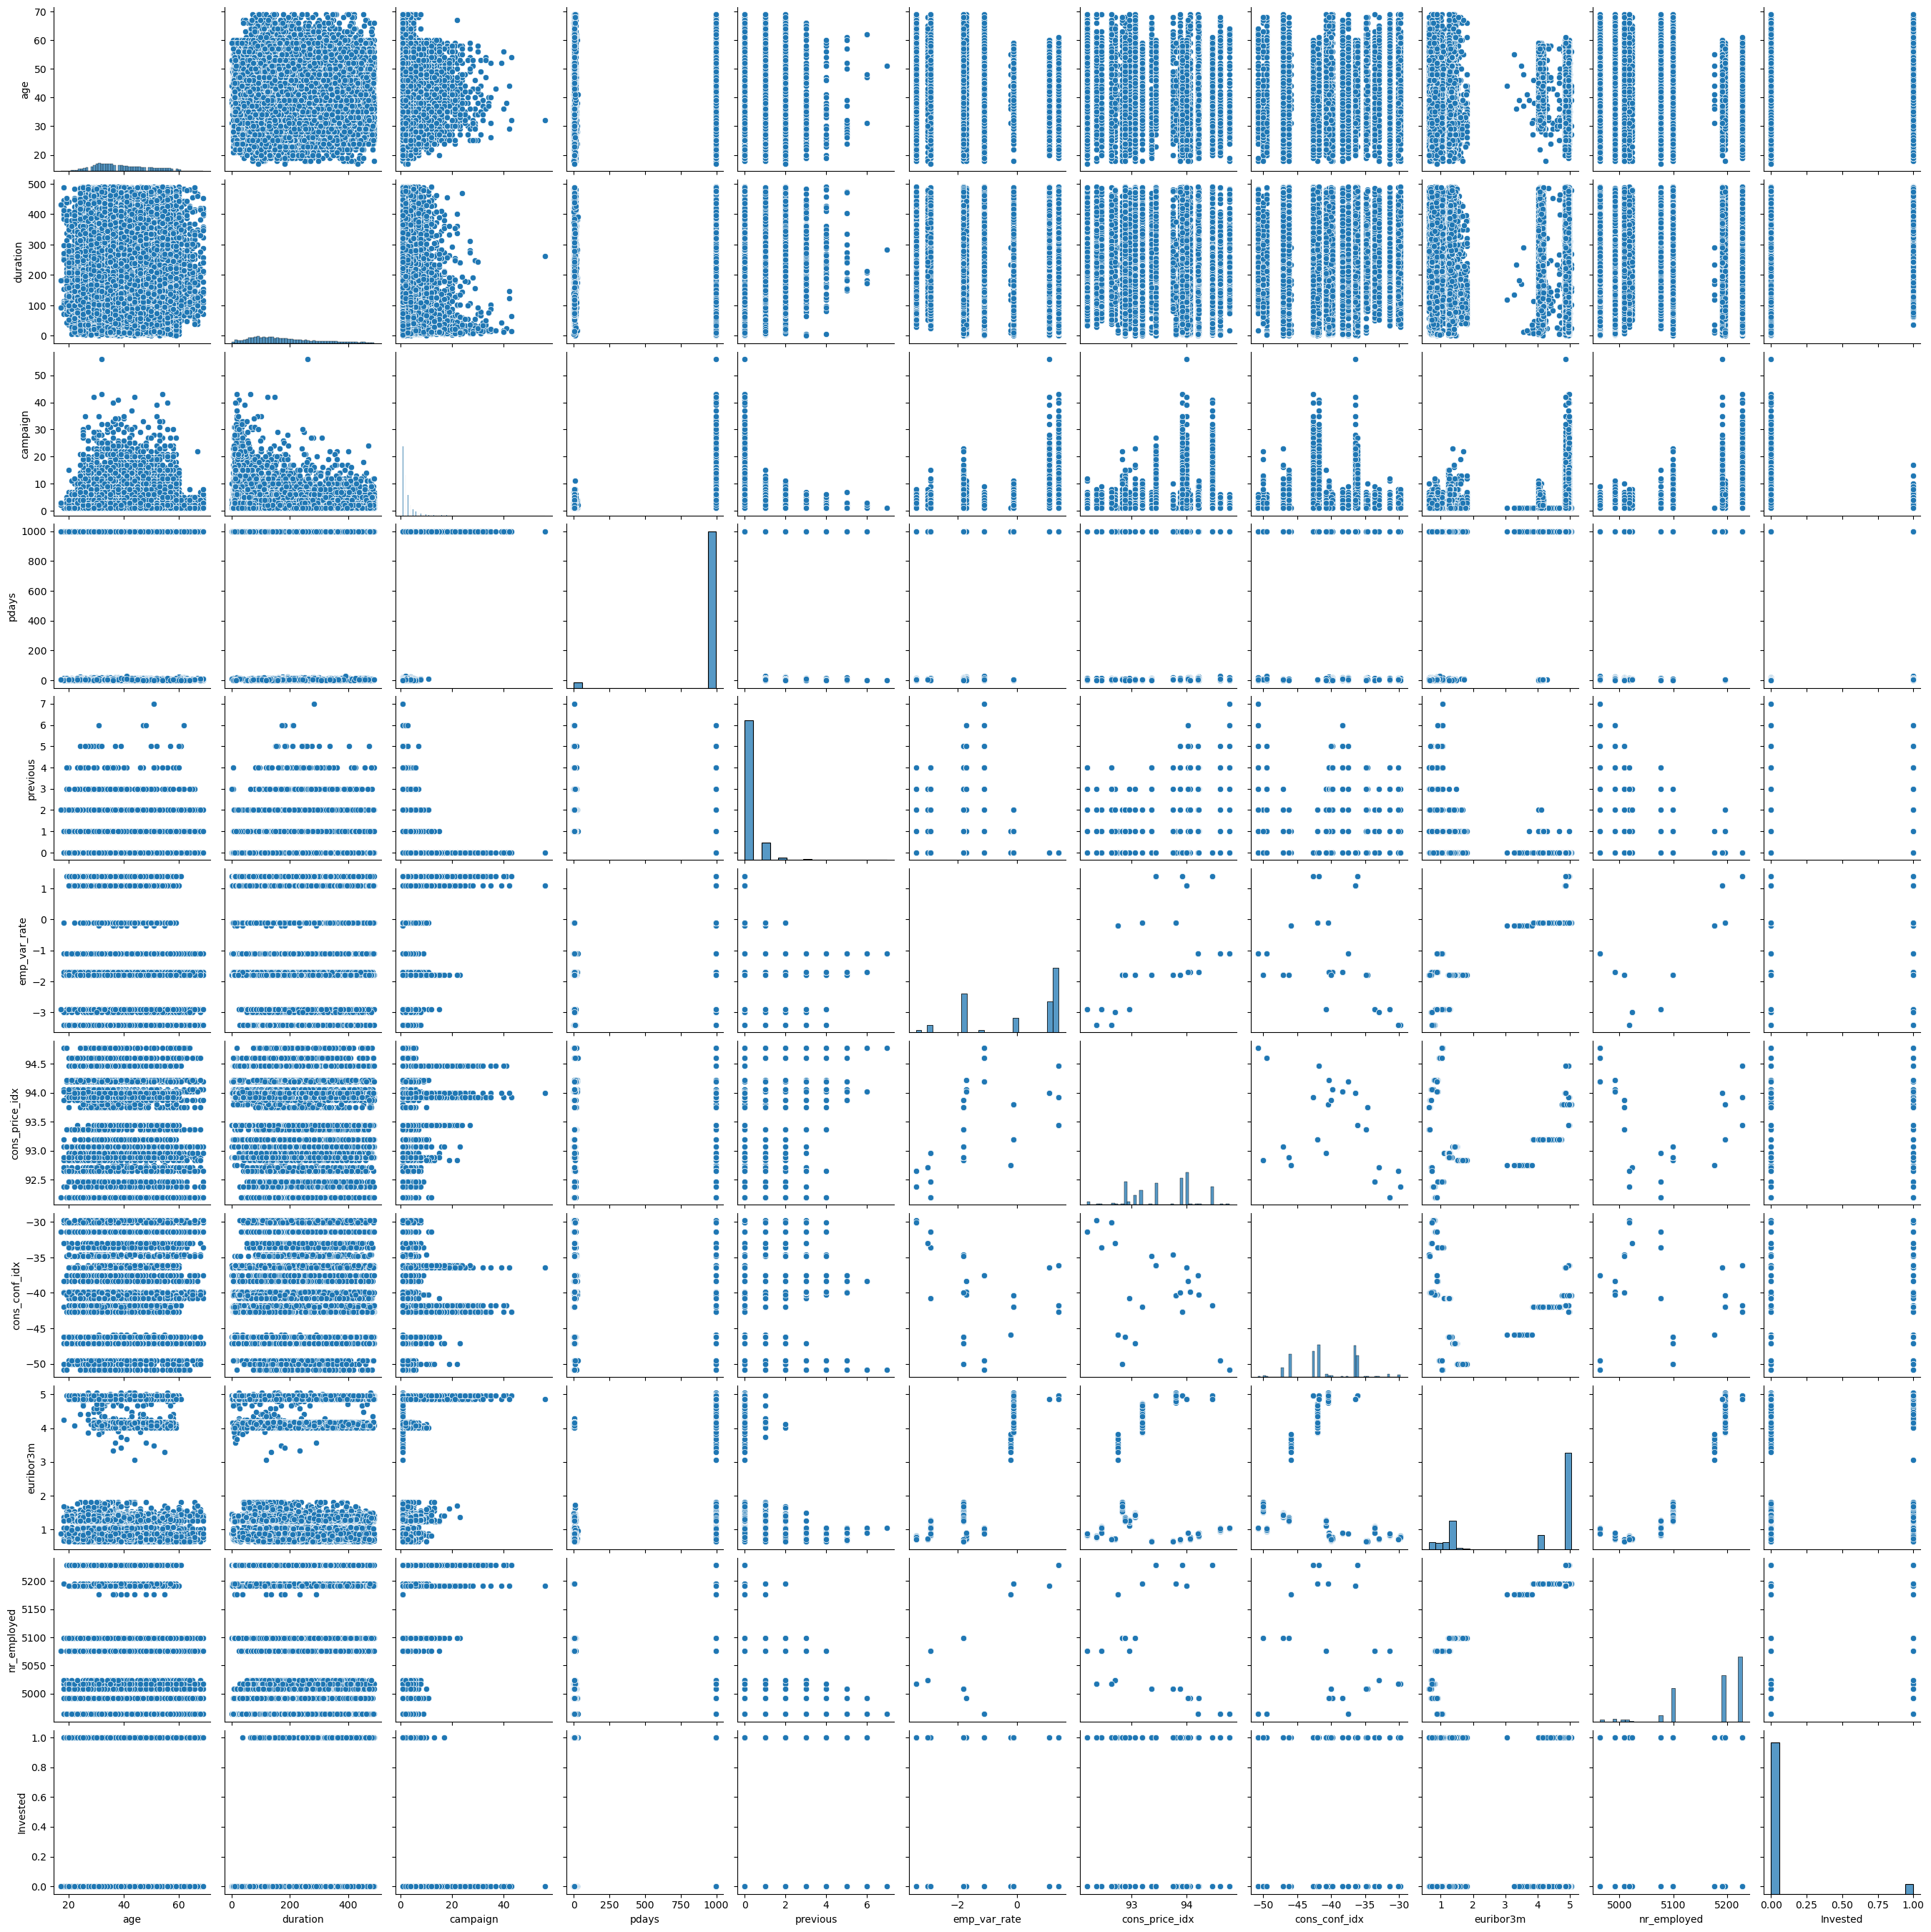

In [36]:
#all plots
sns.pairplot(df)

# Distribution

C:\Users\sreer\AppData\Local\Temp\ipykernel_10080\2799180019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


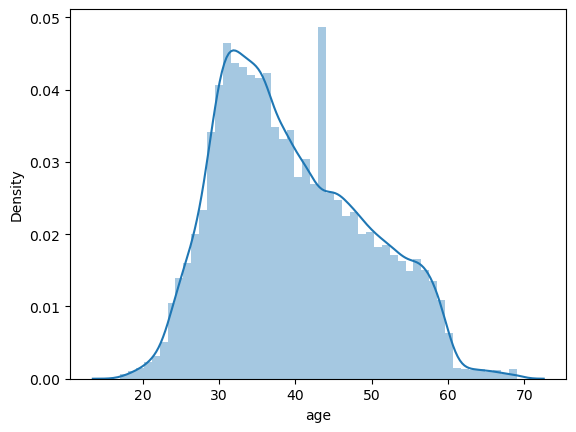

In [37]:
sns.distplot(df['age'])
plt.show()

C:\Users\sreer\AppData\Local\Temp\ipykernel_10080\1710870456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


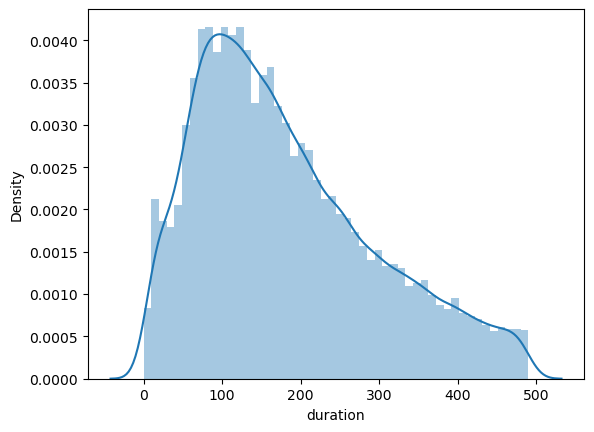

In [38]:
sns.distplot(df['duration'])
plt.show()

C:\Users\sreer\AppData\Local\Temp\ipykernel_10080\3974572420.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['emp_var_rate'])


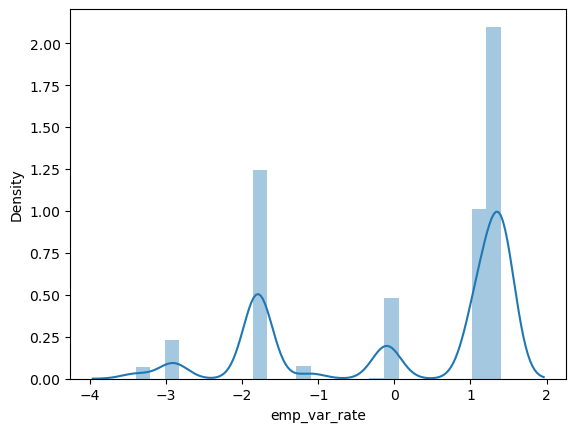

In [39]:
sns.distplot(df['emp_var_rate'])
plt.show()

# Data mix

<Axes: xlabel='Invested'>

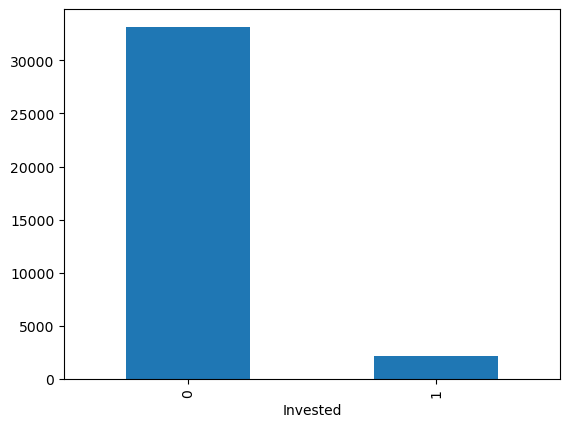

In [40]:
df.groupby('Invested')['Invested'].count().plot(kind='bar')
#this is imbalanced class it will affect the programming. across industry we get only imbalanced data

In [41]:
#correlation plot
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [42]:
#remove categorica; variables
df_numeric=df_numeric.drop(['campaign','pdays','previous'], axis=1)

In [43]:
#df_numeric.head()

<Axes: >

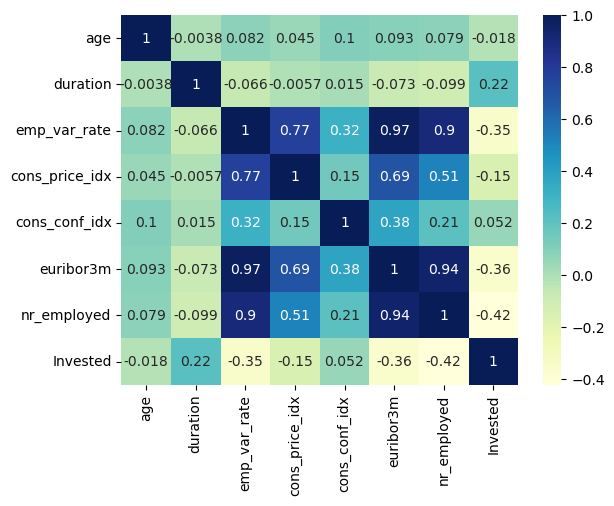

In [44]:
#heatmap
sns.heatmap(df_numeric.corr(), cmap='YlGnBu', annot=True)

In [45]:
#One-hot-encoding
df_categorical=df.select_dtypes(include='object')
df_categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...
41182,admin.,married,high.school,no,yes,no,cellular,may,thu,failure
41183,retired,married,high.school,unknown,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,basic,unknown,no,no,telephone,may,thu,nonexistent
41185,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,nonexistent


why do we drop 1st column after conerting dummies?

The first column represents the absence of any categorical and is redundant because the absence of any category is 
already represented by the absence of all other categories.so dropping the column reduce the dimensionality of the data 
without losing any valuable information and also prevents multicollinearity, arise when there are highly 
correlated inpdt variables

In [46]:
#create dummies
df_dummies=pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [47]:
#create final data
df_final=pd.concat([df_numeric,df_dummies], axis=1)
df_final.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Invested,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0,True,False,...,False,False,False,False,False,True,False,False,True,False
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0,False,False,...,False,True,False,False,False,False,False,False,True,False
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1,False,False,...,False,False,False,False,False,True,False,False,False,True
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1,False,False,...,False,False,False,False,False,False,False,False,False,True


In [48]:
#create x and y
x=df_final.drop('Invested', axis=1)
y=df_final['Invested']

In [49]:
#check x and y
print(x.shape, y.shape)

(35350, 48) (35350,)


# Feature Selection

In [50]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.3, random_state=999)

In [51]:
#check sample size
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(24745, 48) (10605, 48) (24745,) (10605,)


# feature Selection using Chi-square test

* Dimesionality reducation is used to deleting or removing the non significant variavbles
* When we have to many columns in the data it is called curse of dimentionality 

# Feature Selection suing Chi-square test

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

key_features=SelectKBest(score_func=f_classif, k=4)
#to select 4 significant features

#fit the key features to the trainig data and transform it
xtrain_selected = key_features.fit_transform(xtrain, ytrain)

#select the get the indices of the selected features
selected_indices = key_features.get_support(indices=True)

#get the names of the selected features
selected_features = xtrain.columns[selected_indices]

In [53]:
selected_indices

array([ 2,  5,  6, 47], dtype=int64)

In [54]:
#create x_train based on the selected features
x_train=xtrain[selected_features]

In [55]:
x_train.columns

Index(['emp_var_rate', 'euribor3m', 'nr_employed', 'poutcome_success'], dtype='object')

In [56]:
#store KBest columns from xtest to x_test
x_test=xtest[selected_features]

# Logistic Regression Alogrithm

In [57]:
#iinstantiate logistic regression
logreg=LogisticRegression()

# Model 1: Build a model using all features

In [58]:
#train the model
logreg.fit(xtrain,ytrain)

C:\Users\sreer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
#check training accuracy
logreg.score(xtrain,ytrain)
#accuracy=.94

0.9494847443928066

In [60]:
#y_pred = logreg.predict(xtest)

# Model 2: Using selected K=4 Best variables

* Built a model with 5 variables, Accuracy was .95
* Built another model with 4 variables , accuracy was .94 hence continue with k=4

In [61]:
#train the model using xtrain and ytrain (fit the model)
logreg.fit(x_train,ytrain)

LogisticRegression()

In [62]:
logreg.score(x_train,ytrain)

0.9446756920590018

In [63]:
#predict investment using test data
lr_predicted=logreg.predict(x_test)

In [64]:
lr_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
logreg.score(x_test,ytest)

0.9469118340405469

In [66]:
#print confusion matrix
confusion_matrix(ytest, lr_predicted)

array([[9852,   95],
       [ 468,  190]], dtype=int64)

In [67]:
(9852+190)/(9852+95+468+190)

0.9469118340405469

# Score to check Model Performance

* Accuracy=(TN+TP)/(TN+TP+FN+FP)
* Precision=TP/(TP+FP)

* Recall=TP/(TP+FN)
* F-score=2*Precision*Recall/(Precision+Recall)

In [68]:
#store logistic regression scores in seperate variables
lr_accuracy=accuracy_score(ytest, lr_predicted)
lr_precision=precision_score(ytest, lr_predicted)
lr_recall=recall_score(ytest, lr_predicted)
lr_fscore=f1_score(ytest, lr_predicted)

In [69]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[['Log Reg', lr_accuracy,lr_precision, lr_recall,lr_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,Log Reg,0.946912,0.666667,0.288754,0.402969


# KNN (K-nearest neighbours) Algorithm

* if we want to know about the data then check the data near the data that we want to test
* if we want to test the customers will invest or not then not check the customers but check the customers of similar profile 

In [70]:
#import knn library from sk learn
from sklearn.neighbors import KNeighborsClassifier

In [71]:
#create model object
#there are 2 technique and eucldean is used to find the distance between two points
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [72]:
#fit knn model
knn.fit(x_train, ytrain)

KNeighborsClassifier(metric='euclidean')

In [73]:
#predict y using knn
knn_predicted=knn.predict(x_test)

In [74]:
#check scores
knn_accuracy=accuracy_score(ytest, knn_predicted)
knn_precision=precision_score(ytest, knn_predicted)
knn_recall=recall_score(ytest, knn_predicted)
knn_fscore=f1_score(ytest, knn_predicted)

In [75]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[['knn', knn_accuracy,knn_precision, knn_recall,knn_fscore],['Log Reg', lr_accuracy,lr_precision, lr_recall,lr_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,knn,0.940311,0.524178,0.411854,0.461277
1,Log Reg,0.946912,0.666667,0.288754,0.402969


In [76]:
#outliers dont impact random,naive,decision
#outliers impact log,linear reg,knn

# Naive Bayes Algorithm

* bayes theorem is used to find the conditinal prob
* it will find the investment of the customers based on condition (like custmr has degree or cust in white collar job)
* logistic regression calculates probility using sigmoid function and naive bayes calculates prob using bayes thrm 

In [77]:
#import naive bayes model
from sklearn.naive_bayes import GaussianNB

In [78]:
#create a Gaussian classifier
gnb=GaussianNB()

In [79]:
#train the model suing the training sets
gnb.fit(x_train,ytrain)

GaussianNB()

In [80]:
#predict output
gnb_predicted=gnb.predict(x_test)

In [81]:
#check scores
gnb_accuracy=accuracy_score(ytest, gnb_predicted)
gnb_precision=precision_score(ytest, gnb_predicted)
gnb_recall=recall_score(ytest, gnb_predicted)
gnb_fscore=f1_score(ytest, gnb_predicted)

In [82]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[['knn', knn_accuracy,knn_precision, knn_recall,knn_fscore],['Log Reg', lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ['Naive bayes',gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,knn,0.940311,0.524178,0.411854,0.461277
1,Log Reg,0.946912,0.666667,0.288754,0.402969
2,Naive bayes,0.916737,0.401055,0.693009,0.508078


# Decision Tree Classifier

* entropy means uncertanity in data.
* customer with no problem may invest and there may be a profile with same conditions(no problems) may not invest based on
 * emotions,financial stability but alogirthm have no feelings so it checks some variables only.this is uncertanity.
* entropy is used to find the root node.when entroy is low then it is the root node
* pruning means eliminating the non sig variables

In [83]:
#import decision tree classifier library from sklearn
from sklearn.tree import DecisionTreeClassifier

In [84]:
#create model object
dtree=DecisionTreeClassifier(max_depth=5)

In [85]:
#fit the training model
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [86]:
#test the model using xtest
dtree_predicted=dtree.predict(xtest)

In [87]:
#check scores
dtree_accuracy=accuracy_score(ytest, dtree_predicted)
dtree_precision=precision_score(ytest, dtree_predicted)
dtree_recall=recall_score(ytest, dtree_predicted)
dtree_fscore=f1_score(ytest, dtree_predicted)

In [88]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[['KNN', knn_accuracy,knn_precision, knn_recall,knn_fscore],
     ['Log Reg', lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ['Naive bayes',gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ["Decision Tree",dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,KNN,0.940311,0.524178,0.411854,0.461277
1,Log Reg,0.946912,0.666667,0.288754,0.402969
2,Naive bayes,0.916737,0.401055,0.693009,0.508078
3,Decision Tree,0.954644,0.691974,0.484802,0.570152


In [89]:
#here x_train is not taking because pruning will be done by decision tree and will remove the non sig variables

# Random Forest

In [90]:
#import Random forest library from sklearn
from sklearn.ensemble import RandomForestClassifier

In [91]:
#creating a RF classifier
rfc=RandomForestClassifier(n_estimators = 100)

In [92]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [93]:
rfc_predicted=rfc.predict(xtest)

In [94]:
#check scores
rfc_accuracy=accuracy_score(ytest, rfc_predicted)
rfc_precision=precision_score(ytest, rfc_predicted)
rfc_recall=recall_score(ytest, rfc_predicted)
rfc_fscore=f1_score(ytest, rfc_predicted)

In [95]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[['KNN', knn_accuracy,knn_precision, knn_recall,knn_fscore],
     ['Log Reg', lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ['Naive bayes',gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ["Decision Tree",dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore],
     ["Random forest",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,KNN,0.940311,0.524178,0.411854,0.461277
1,Log Reg,0.946912,0.666667,0.288754,0.402969
2,Naive bayes,0.916737,0.401055,0.693009,0.508078
3,Decision Tree,0.954644,0.691974,0.484802,0.570152
4,Random forest,0.955116,0.686475,0.509119,0.584642


# SVM (Support vector machine)

In [96]:
#support vector machine (svc:support vector classifier)
from sklearn.svm import SVC


In [97]:
#create an instance of SVM
svm=SVC(kernel='linear')

In [98]:
#fit the model
svm.fit(x_train,ytrain)

SVC(kernel='linear')

In [99]:
#predict the response from the xtest
svm_predicted=svm.predict(x_test)

In [100]:
#check scores
svm_accuracy=accuracy_score(ytest, svm_predicted)
svm_precision=precision_score(ytest, svm_predicted)
svm_recall=recall_score(ytest, svm_predicted)
svm_fscore=f1_score(ytest, svm_predicted)

In [101]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[['KNN', knn_accuracy,knn_precision, knn_recall,knn_fscore],
     ['Log Reg', lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ['Naive bayes',gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ["Decision Tree",dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore],
     ["Random forest",rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ["SVM",svm_accuracy,svm_precision,svm_recall,svm_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,KNN,0.940311,0.524178,0.411854,0.461277
1,Log Reg,0.946912,0.666667,0.288754,0.402969
2,Naive bayes,0.916737,0.401055,0.693009,0.508078
3,Decision Tree,0.954644,0.691974,0.484802,0.570152
4,Random forest,0.955116,0.686475,0.509119,0.584642
5,SVM,0.945875,0.689189,0.232523,0.347727
